In [2]:
#import all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#ignore warnings

import warnings
warnings.filterwarnings('ignore')

# preprocessing

In [3]:
df = pd.read_csv(r"C:\Users\ahmed\Desktop\my projects\UNI-Fraud-detection\AI-project\fraudTrain.csv",parse_dates=['Time'])

In [4]:
df.head()

,ID,Time,Card Number,merchant,category,Amount,firstName,lastName,trans_num,is_fraud
0,0,2019-01-01 00:00:00,2.700000e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,0b242abb623afc578575680df30655b9,0.0
1,1,2019-01-01 00:00:00,6.300000e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,1f76529f8574734946361c461b024d99,0.0
2,2,2019-01-01 00:00:00,3.890000e+13,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,a1a22d70485983eac12b5b88dad1cf95,0.0
3,3,2019-01-01 00:01:00,3.530000e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,6b849c168bdad6f867558c3793159a81,0.0
4,4,2019-01-01 00:03:00,3.760000e+14,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,a41d7549acf90789359a9aa5346dcb46,0.0


In [5]:
df.describe()

,ID,Time,Card Number,Amount,is_fraud
count,1.002104e+06,1002104,1.002104e+06,1.002103e+06,1.002103e+06
mean,5.010515e+05,2019-08-04 22:56:49.627184128,4.171374e+17,7.025616e+01,5.701011e-03
min,0.000000e+00,2019-01-01 00:00:00,6.041621e+10,1.000000e+00,0.000000e+00
25%,2.505258e+05,2019-05-05 11:43:00,1.800000e+14,9.640000e+00,0.000000e+00
50%,5.010515e+05,2019-08-05 16:02:30,3.520000e+15,4.742000e+01,0.000000e+00
75%,7.515772e+05,2019-11-17 17:16:00,4.640000e+15,8.304000e+01,0.000000e+00
max,1.002103e+06,2020-02-15 16:43:00,4.990000e+18,2.894890e+04,1.000000e+00
std,2.892827e+05,NaN,1.308840e+18,1.602039e+02,7.528954e-02


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002104 entries, 0 to 1002103
Data columns (total 10 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   ID           1002104 non-null  int64         
 1   Time         1002104 non-null  datetime64[ns]
 2   Card Number  1002104 non-null  float64       
 3   merchant     1002104 non-null  object        
 4   category     1002104 non-null  object        
 5   Amount       1002103 non-null  float64       
 6   firstName    1002103 non-null  object        
 7   lastName     1002103 non-null  object        
 8   trans_num    1002103 non-null  object        
 9   is_fraud     1002103 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 76.5+ MB


In [7]:
# get the nulls of the df with the percentage of nulls in each column

null_values = df.isnull().sum()
percent_null_values = (null_values / len(df)) * 100

null_df = pd.DataFrame({
    "Column Name": df.columns,
    "Null Values": null_values,
    "Percentage of Null Values": percent_null_values,
})

print(null_df)

             Column Name  Null Values  Percentage of Null Values
ID                    ID            0                     0.0000
Time                Time            0                     0.0000
Card Number  Card Number            0                     0.0000
merchant        merchant            0                     0.0000
category        category            0                     0.0000
Amount            Amount            1                     0.0001
firstName      firstName            1                     0.0001
lastName        lastName            1                     0.0001
trans_num      trans_num            1                     0.0001
is_fraud        is_fraud            1                     0.0001


In [8]:
df.shape

(1002104, 10)

All the nulls in the df are from one row so we dont need to deal with it we will just delete it

In [9]:
# value of the null row of the trans_number
print(df.loc[df['is_fraud'].isnull()])
df = df.dropna(subset=['is_fraud'])

              ID                Time   Card Number         merchant category  \
1002103  1002103 2020-02-15 16:43:00  2.270000e+15  fraud_Brown Inc    kids_   

         Amount firstName lastName trans_num  is_fraud  
1002103     NaN       NaN      NaN       NaN       NaN  


<Axes: xlabel='Amount'>

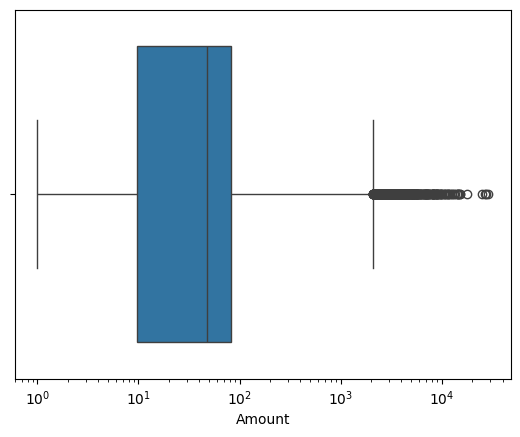

In [10]:
#box plot of the amount column
sns.boxplot(x="Amount", data=df,log_scale=True)

The amount is the only numerical column we can get insights from.
the outlires here are not noise and they are not fraud transactions 

In [11]:
print(df['Card Number'].value_counts())

Card Number
6.010000e+15    48915
2.130000e+14    40189
1.800000e+14    30881
3.560000e+15    21450
3.530000e+15    21329
                ...  
5.300000e+15       11
5.140000e+15       10
4.840000e+12       10
4.160000e+18       10
6.580000e+15        7
Name: count, Length: 320, dtype: int64


In [12]:
#print the card numbers with the label = 1
print(df[df['is_fraud']==1]['Card Number'].value_counts())

Card Number
6.010000e+15    300
1.800000e+14    234
2.130000e+14    177
3.540000e+15    167
6.760000e+11    161
               ... 
4.020000e+18      5
4.590000e+18      5
4.860000e+12      4
4.910000e+15      3
4.230000e+18      3
Name: count, Length: 248, dtype: int64


In [13]:
df['merchant'].value_counts()

merchant
fraud_Kilback LLC                       3361
fraud_Cormier LLC                       2854
fraud_Schumm PLC                        2792
fraud_Boyer PLC                         2705
fraud_Kuhn LLC                          2676
                                        ... 
fraud_Kilback, Nitzsche and Leffler      602
fraud_Satterfield-Lowe                   591
fraud_Medhurst, Labadie and Gottlieb     580
fraud_Hahn, Douglas and Schowalter       577
fraud_Reichert-Weissnat                  575
Name: count, Length: 693, dtype: int64

<Axes: xlabel='Amount'>

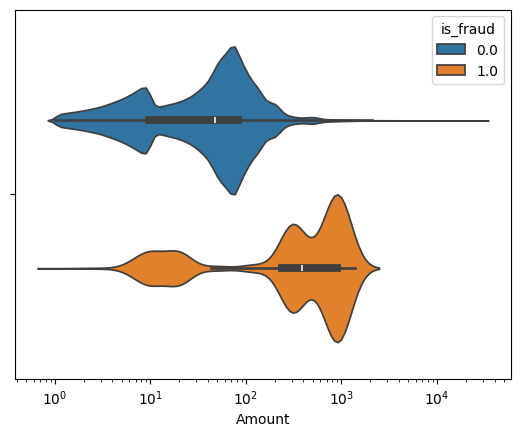

In [108]:
#violin plt of the amount column with hue is_fraud
sns.violinplot(x="Amount", data=df, hue="is_fraud", log_scale=True)

In [13]:
# number of fraud transactions and non-fraud transactions
print("Number of fraud transactions: ", df[df['is_fraud']==1].shape[0])
print("Number of non-fraud transactions: ", df[df['is_fraud']==0].shape[0])


Number of fraud transactions:  5713
Number of non-fraud transactions:  996390


clearly there is imbalance in the data we wont do anything now but we will come back to it to see how we can deal with it

In [14]:
df.describe()

,ID,Time,Card Number,Amount,is_fraud
count,1.002103e+06,1002103,1.002103e+06,1.002103e+06,1.002103e+06
mean,5.010510e+05,2019-08-04 22:56:32.836923392,4.171379e+17,7.025616e+01,5.701011e-03
min,0.000000e+00,2019-01-01 00:00:00,6.041621e+10,1.000000e+00,0.000000e+00
25%,2.505255e+05,2019-05-05 11:43:00,1.800000e+14,9.640000e+00,0.000000e+00
50%,5.010510e+05,2019-08-05 16:02:00,3.520000e+15,4.742000e+01,0.000000e+00
75%,7.515765e+05,2019-11-17 17:16:00,4.640000e+15,8.304000e+01,0.000000e+00
max,1.002102e+06,2020-02-15 16:42:00,4.990000e+18,2.894890e+04,1.000000e+00
std,2.892824e+05,NaN,1.308841e+18,1.602039e+02,7.528954e-02


<Axes: xlabel='diff(mean-amount)', ylabel='Count'>

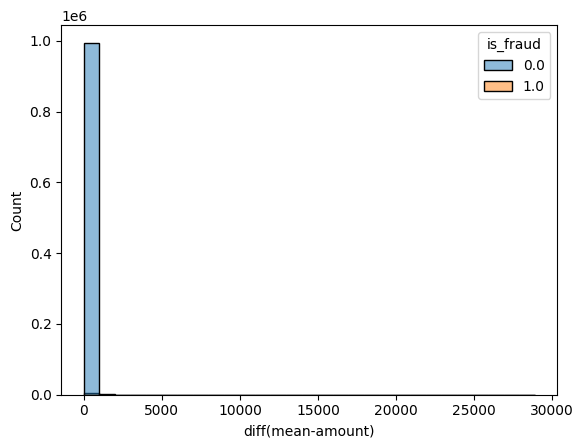

In [18]:
# i want to bar plot the amount column with hue is_fraud with log scale and rotate the x-axis labels
sns.histplot(x="diff(mean-amount)", data=df, hue="is_fraud",binwidth=1000)
# sns.barplot(x="Amount", data=df, hue="is_fraud")

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1002103 entries, 0 to 1002102
Data columns (total 10 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   ID           1002103 non-null  int64         
 1   Time         1002103 non-null  datetime64[ns]
 2   Card Number  1002103 non-null  float64       
 3   merchant     1002103 non-null  object        
 4   category     1002103 non-null  object        
 5   Amount       1002103 non-null  float64       
 6   firstName    1002103 non-null  object        
 7   lastName     1002103 non-null  object        
 8   trans_num    1002103 non-null  object        
 9   is_fraud     1002103 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 84.1+ MB


In [16]:
#drop ID firstName lastName trans_num merchant from the dataframe
df.drop(columns=['ID', 'firstName', 'lastName', 'trans_num', 'merchant','Card Number'],inplace=True)


# feature engineering

In [20]:
df.head()

,Time,category,Amount,is_fraud
0,2019-01-01 00:00:00,misc_net,4.97,0.0
1,2019-01-01 00:00:00,grocery_pos,107.23,0.0
2,2019-01-01 00:00:00,entertainment,220.11,0.0
3,2019-01-01 00:01:00,gas_transport,45.00,0.0
4,2019-01-01 00:03:00,misc_pos,41.96,0.0


In [17]:

df.sort_values(by='Time', inplace=True)
df['seconds'] = (df['Time'] - df['Time'].min()).dt.total_seconds()
df['diff(mean-seconds)'] = abs(df['seconds'] - df['seconds'].mean())
df['diff(mean-amount)'] = abs(df['Amount'] - df['Amount'].mean())
df['ratio_currentTime_to_averageTime'] = df['seconds'] / df['seconds'].mean()
df['hour'] = df['Time'].dt.hour
df['minute'] = df['Time'].dt.minute
df['second'] = df['Time'].dt.second

In [26]:
df.drop(columns=['Time','seconds'],inplace=True)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1002103 entries, 0 to 1002102
Data columns (total 9 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   category                          1002103 non-null  object 
 1   Amount                            1002103 non-null  float64
 2   is_fraud                          1002103 non-null  float64
 3   diff(mean-seconds)                1002103 non-null  float64
 4   diff(mean-amount)                 1002103 non-null  float64
 5   ratio_currentTime_to_averageTime  1002103 non-null  float64
 6   hour                              1002103 non-null  int32  
 7   minute                            1002103 non-null  int32  
 8   second                            1002103 non-null  int32  
dtypes: float64(5), int32(3), object(1)
memory usage: 65.0+ MB


In [19]:
df.describe()

,Time,Amount,is_fraud,seconds,diff(mean-seconds),diff(mean-amount),ratio_currentTime_to_averageTime,hour,minute,second
count,1002103,1.002103e+06,1.002103e+06,1.002103e+06,1.002103e+06,1.002103e+06,1.002103e+06,1.002103e+06,1.002103e+06,1002103.0
mean,2019-08-04 22:56:32.836923392,7.025616e+01,5.701011e-03,1.865859e+07,8.344084e+06,5.759861e+01,1.000000e+00,1.280453e+01,2.948970e+01,0.0
min,2019-01-01 00:00:00,1.000000e+00,0.000000e+00,0.000000e+00,2.716308e+01,3.842958e-03,0.000000e+00,0.000000e+00,0.000000e+00,0.0
25%,2019-05-05 11:43:00,9.640000e+00,0.000000e+00,1.075578e+07,3.999723e+06,1.898616e+01,5.764518e-01,7.000000e+00,1.400000e+01,0.0
50%,2019-08-05 16:02:00,4.742000e+01,0.000000e+00,1.872012e+07,8.476113e+06,4.486384e+01,1.003298e+00,1.400000e+01,3.000000e+01,0.0
75%,2019-11-17 17:16:00,8.304000e+01,0.000000e+00,2.771016e+07,1.218039e+07,6.446616e+01,1.485115e+00,1.900000e+01,4.400000e+01,0.0
max,2020-02-15 16:42:00,2.894890e+04,1.000000e+00,3.548412e+07,1.865859e+07,2.887864e+04,1.901758e+00,2.300000e+01,5.900000e+01,0.0
std,NaN,1.602039e+02,7.528954e-02,9.710730e+06,4.967340e+06,1.494914e+02,5.204428e-01,6.816683e+00,1.732029e+01,0.0


In [20]:
df['category'].unique()

array(['misc_net', 'grocery_pos', 'entertainment', 'gas_transport',
       'misc_pos', 'grocery_net', 'shopping_net', 'shopping_pos',
       'food_dining', 'health_fitness', 'personal_care', 'travel',
       'kids_pets', 'home'], dtype=object)

In [25]:
print(df['diff(mean-seconds)'].mean())
print(df['diff(mean-seconds)'].std())

8344083.826574826
4967339.739036268


In [23]:
print(df['Amount'].mean())
print(df['Amount'].std())

70.25615704174125
160.20387321710024


In [24]:
print(df['hour'].mean())
print(df['hour'].std())

12.80452608165029
6.81668252303722


In [28]:
#encode the category column using label encoder
from sklearn.preprocessing import LabelEncoder

# Assuming 'column_to_encode' is the column you want to encode
encoder = LabelEncoder()
df['category'] = encoder.fit_transform(df['category'])


In [29]:
print("Skewness of each column:")
print(df.skew())

Skewness of each column:
category                             0.048450
Amount                              42.470109
is_fraud                            13.130641
diff(mean-seconds)                   0.069071
diff(mean-amount)                   51.112831
ratio_currentTime_to_averageTime    -0.119493
hour                                -0.283361
minute                              -0.000404
second                               0.000000
dtype: float64


In [137]:
# remove outlires from columns using iqr
q1 = df['Amount'].quantile(0.25)
q3 = df['Amount'].quantile(0.75)
iqr = q3 - q1
# Remove outliers
df = df[~((df['Amount'] < (q1 - 1.5 * iqr)) | (df['Amount'] > (q3 + 1.5 * iqr)))]

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1002103 entries, 0 to 1002102
Data columns (total 10 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   category                          1002103 non-null  int32  
 1   Amount                            1002103 non-null  float64
 2   is_fraud                          1002103 non-null  float64
 3   seconds                           1002103 non-null  float64
 4   diff(mean-seconds)                1002103 non-null  float64
 5   diff(mean-amount)                 1002103 non-null  float64
 6   ratio_currentTime_to_averageTime  1002103 non-null  float64
 7   hour                              1002103 non-null  int32  
 8   minute                            1002103 non-null  int32  
 9   second                            1002103 non-null  int32  
dtypes: float64(6), int32(4)
memory usage: 68.8 MB


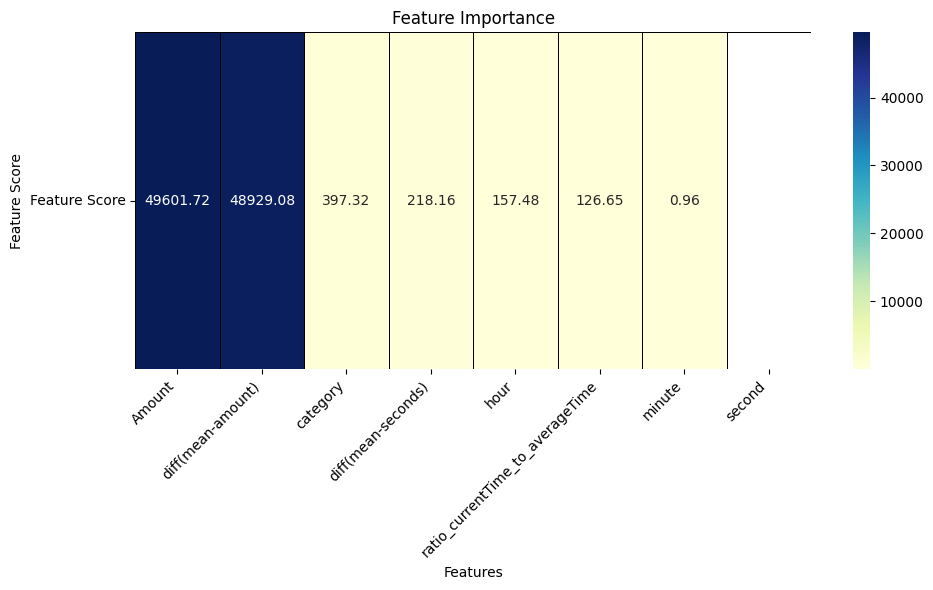

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif

# Assuming df is your DataFrame containing the features and target
features = df[['category','Amount','diff(mean-seconds)','diff(mean-amount)','ratio_currentTime_to_averageTime','hour','minute','second']]
target = df['is_fraud']

best_features = SelectKBest(score_func=f_classif, k='all')
fit = best_features.fit(features, target)

featureScores = pd.DataFrame(data=fit.scores_, index=features.columns, columns=['Feature Score']) # type: ignore
featureScores = featureScores.sort_values(by='Feature Score', ascending=False)

plt.figure(figsize=(10, 6))
sns.heatmap(featureScores.transpose(), annot=True, cmap='YlGnBu', linewidths=0.4, linecolor='black', fmt='.2f')
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Feature Score')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.yticks(rotation=0)  # Keep y-axis labels horizontal
plt.tight_layout()
plt.show()


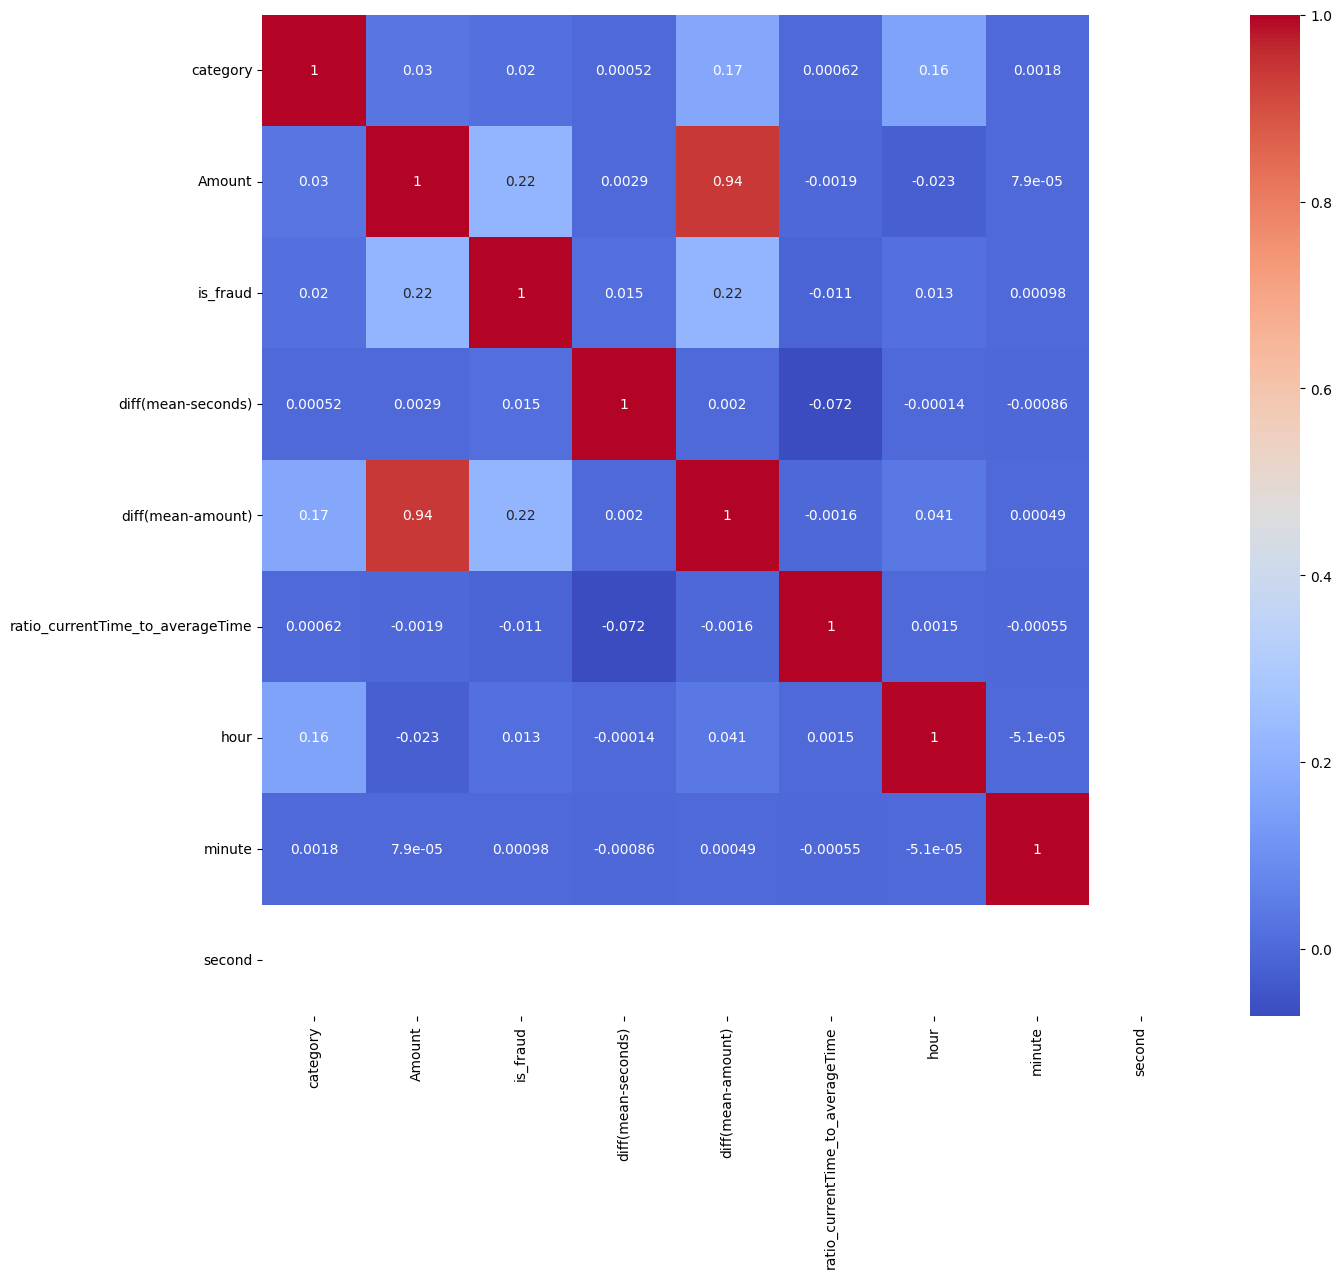

In [31]:
#show the heatmap of the correlation
plt.figure(figsize=(15, 13))  # Set the size of the figure

sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

# Show the plot
plt.show()

okay we engineered 2 features from the Time column and [diff(mean-seconds)] is contributing most to the correlation so we can drop the other two engineered features

In [37]:
df.columns

Index(['category', 'Amount', 'is_fraud', 'diff(mean-seconds)', 'hour'], dtype='object')

In [32]:
df.drop(columns=['second','diff(mean-amount)','minute','ratio_currentTime_to_averageTime'],inplace=True)

In [52]:
df.drop('category',axis=1,inplace=True)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1002103 entries, 0 to 1002102
Data columns (total 5 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   category            1002103 non-null  int32  
 1   Amount              1002103 non-null  float64
 2   is_fraud            1002103 non-null  float64
 3   diff(mean-seconds)  1002103 non-null  float64
 4   hour                1002103 non-null  int32  
dtypes: float64(3), int32(2)
memory usage: 38.2 MB


so its not the case that fraud transactions have large amounts so we can deal with the skewness of the amount column

In [34]:
#i want to see if all the fraud transactions have large amounts
print("Mean of amount of fraud transactions: ", df[df['is_fraud']==1]['Amount'].mean())
print("min of amount of fraud transactions: ", df[df['is_fraud']==1]['Amount'].min())
print("Max of amount of fraud transactions: ", df[df['is_fraud']==1]['Amount'].max())

Mean of amount of fraud transactions:  529.7262541571854
min of amount of fraud transactions:  1.18
Max of amount of fraud transactions:  1371.81


<Axes: ylabel='Amount'>

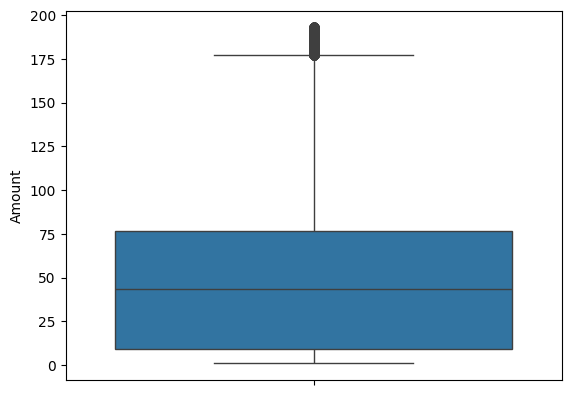

In [29]:
#box plot of all columns
sns.boxplot(y=df['Amount'],data=df)

# Modeling

In [35]:
from imblearn.over_sampling import SMOTE
x_init = df.drop(columns=['is_fraud'])
y_init = df['is_fraud']
smote = SMOTE(sampling_strategy=0.5) # type: ignore
X_resampled, y_resampled = smote.fit_resample(x_init, y_init) # type: ignore

In [41]:
y_resampled.value_counts()

is_fraud
0.0    996390
1.0    498195
Name: count, dtype: int64

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1002103 entries, 0 to 1002102
Data columns (total 5 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   category            1002103 non-null  int32  
 1   Amount              1002103 non-null  float64
 2   is_fraud            1002103 non-null  float64
 3   diff(mean-seconds)  1002103 non-null  float64
 4   hour                1002103 non-null  int32  
dtypes: float64(3), int32(2)
memory usage: 38.2 MB


In [43]:
# columns_to_scale = ['diff(mean-amount)', 'diff(mean-seconds)','category','Amount','TransactionFrequency','AmountFrequencyProduct','AverageTransactionAmount','AmountToAverageRatio','ratio_currentTime_to_averageTime']
#scale using standard scaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_resampled = scaler.fit_transform(X_resampled) # type: ignore

x_init = scaler.fit_transform(x_init)

In [ ]:
# from sklearn.decomposition import PCA

# selected_columns = ['diff(mean-seconds)','diff(mean-amount)', 'ratio_currentTime_to_averageTime', 'hour','minute', 'second']

# data = df[selected_columns]

# pca = PCA(n_components=3)

# pca.fit(data_standardized)

# principal_components = pca.transform(data_standardized)

# pc_columns = [f'PC{i+1}' for i in range(pca.n_components_)]

# principal_df = pd.DataFrame(data=principal_components, columns=pc_columns)

# df[pc_columns] = principal_df

In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1002103 entries, 0 to 1002102
Data columns (total 4 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   category            1002103 non-null  int32  
 1   Amount              1002103 non-null  float64
 2   is_fraud            1002103 non-null  float64
 3   diff(mean-seconds)  1002103 non-null  float64
dtypes: float64(3), int32(1)
memory usage: 34.4 MB


In [36]:
from sklearn.model_selection import train_test_split
# X = scaled_df  # Features
# y = df['is_fraud']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
X_train_noUpsample, X_test_noUpsample, y_train_noUpsample, y_test_noUpsample = train_test_split(x_init, y_init, test_size=0.2, random_state=42)

print("Number of fraud transactions in test set:", y_test.value_counts()[1])
print("Number of fraud transactions in test2 set:", y_test_noUpsample.value_counts()[1])

Number of fraud transactions in test set: 99927
Number of fraud transactions in test2 set: 1081


In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_recall_fscore_support

In [38]:
#try logistic regression




# Initialize and train the logistic regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Predict on the test set
y_pred = logreg.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)



Accuracy: 0.9080145993703937
Confusion Matrix:
[[194559   4431]
 [ 23065  76862]]


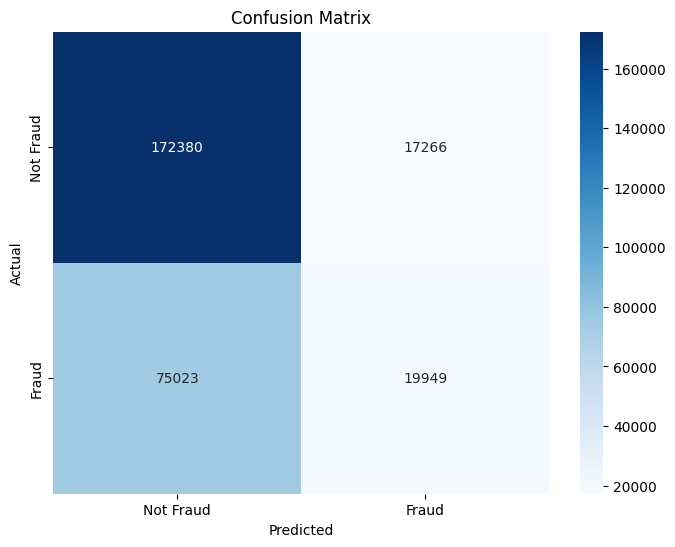

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [39]:



# Initialize Gradient Boosting Classifier
gb_classifier_noUpsample = GradientBoostingClassifier()

# Train the model
gb_classifier_noUpsample.fit(X_train_noUpsample, y_train_noUpsample)

# Predict on the test set
y_pred_gb = gb_classifier_noUpsample.predict(X_test_noUpsample)

# Calculate accuracy
accuracy_gb = accuracy_score(y_test_noUpsample, y_pred_gb)
conf_matrix_gb = confusion_matrix(y_test_noUpsample, y_pred_gb)
# Generate confusion matrix
precision_gb, recall_gb, f1_score_gb, _ = precision_recall_fscore_support(y_test_noUpsample, y_pred_gb, average='binary')

print("Accuracy (Gradient Boosting):", accuracy_gb)
print("Precision (Gradient Boosting):", precision_gb)
print("Recall (Gradient Boosting):", recall_gb)

# Generate confusion matrix

print("Confusion Matrix (Gradient Boosting):")
print(conf_matrix_gb)

# Generate classification report
print("Classification Report (Gradient Boosting):")
print(classification_report(y_test_noUpsample, y_pred_gb))



Accuracy (Gradient Boosting): 0.9971509971509972
Precision (Gradient Boosting): 0.8102189781021898
Recall (Gradient Boosting): 0.6160962072155411
Confusion Matrix (Gradient Boosting):
[[199184    156]
 [   415    666]]
Classification Report (Gradient Boosting):
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    199340
         1.0       0.81      0.62      0.70      1081

    accuracy                           1.00    200421
   macro avg       0.90      0.81      0.85    200421
weighted avg       1.00      1.00      1.00    200421



In [48]:
gb_classifier = GradientBoostingClassifier()

# Train the model
gb_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred_gb = gb_classifier.predict(X_test)

# Calculate accuracy
accuracy_gb = accuracy_score(y_test, y_pred_gb)
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
# Generate confusion matrix
precision_gb, recall_gb, f1_score_gb, _ = precision_recall_fscore_support(y_test, y_pred_gb, average='binary')

print("Accuracy (Gradient Boosting):", accuracy_gb)
print("Precision (Gradient Boosting):", precision_gb)
print("Recall (Gradient Boosting):", recall_gb)

# Generate confusion matrix

print("Confusion Matrix (Gradient Boosting):")
print(conf_matrix_gb)

# Generate classification report
print("Classification Report (Gradient Boosting):")
print(classification_report(y_test, y_pred_gb))

Accuracy (Gradient Boosting): 0.9457775904348029
Precision (Gradient Boosting): 0.9509312822501589
Recall (Gradient Boosting): 0.8833848709557978
Confusion Matrix (Gradient Boosting):
[[194435   4555]
 [ 11653  88274]]
Classification Report (Gradient Boosting):
              precision    recall  f1-score   support

         0.0       0.94      0.98      0.96    198990
         1.0       0.95      0.88      0.92     99927

    accuracy                           0.95    298917
   macro avg       0.95      0.93      0.94    298917
weighted avg       0.95      0.95      0.95    298917



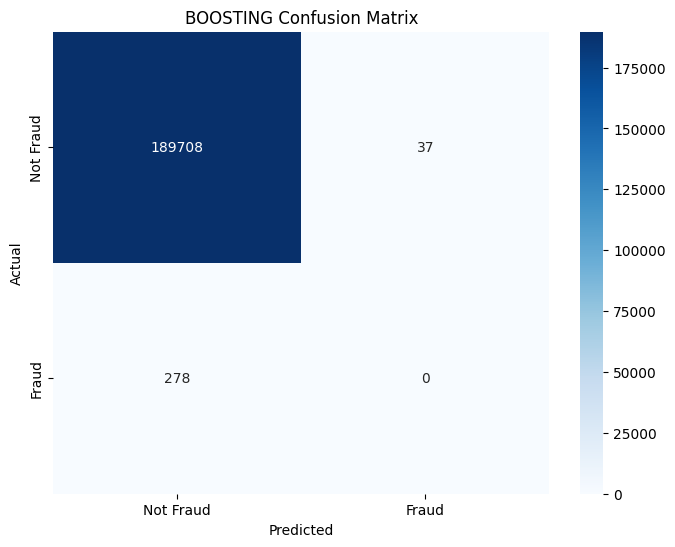

In [89]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_gb, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('BOOSTING Confusion Matrix')
plt.show()

In [40]:



# Initialize XGBoost Classifier
xgb_classifier_noUpsample = XGBClassifier()

# Train the model
xgb_classifier_noUpsample.fit(X_train_noUpsample, y_train_noUpsample)

# Predict on the test set
y_pred_xgb = xgb_classifier_noUpsample.predict(X_test_noUpsample)

# Calculate accuracy
accuracy_xgb = accuracy_score(y_test_noUpsample, y_pred_xgb)
print("Accuracy (XGBoost):", accuracy_xgb)

# Generate confusion matrix
conf_matrix_xgb = confusion_matrix(y_test_noUpsample, y_pred_xgb)
# Generate confusion matrix
precision_xgb, recall_xgb, f1_score_xgb, _ = precision_recall_fscore_support(y_test_noUpsample, y_pred_xgb, average='binary')

print("Accuracy (XGB):", accuracy_xgb)
print("Precision (XGB):", precision_xgb)
print("Recall (XGB):", recall_xgb)

# Generate confusion matrix

print("Confusion Matrix (XGB):")
print(conf_matrix_xgb)

# Generate classification report
print("Classification Report (XGB):")
print(classification_report(y_test_noUpsample, y_pred_xgb))






Accuracy (XGBoost): 0.997864495237525
Accuracy (XGB): 0.997864495237525
Precision (XGB): 0.8739977090492554
Recall (XGB): 0.7058279370952821
Confusion Matrix (XGB):
[[199230    110]
 [   318    763]]
Classification Report (XGB):
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    199340
         1.0       0.87      0.71      0.78      1081

    accuracy                           1.00    200421
   macro avg       0.94      0.85      0.89    200421
weighted avg       1.00      1.00      1.00    200421



In [50]:
xgb_classifier = XGBClassifier()

# Train the model
xgb_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred_xgb = xgb_classifier.predict(X_test)

# Calculate accuracy
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("Accuracy (XGBoost):", accuracy_xgb)

# Generate confusion matrix
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
# Generate confusion matrix
precision_xgb, recall_xgb, f1_score_xgb, _ = precision_recall_fscore_support(y_test, y_pred_xgb, average='binary')

print("Accuracy (XGB):", accuracy_xgb)
print("Precision (XGB):", precision_xgb)
print("Recall (XGB):", recall_xgb)

# Generate confusion matrix

print("Confusion Matrix (XGB):")
print(conf_matrix_xgb)

# Generate classification report
print("Classification Report (XGB):")
print(classification_report(y_test, y_pred_xgb))

Accuracy (XGBoost): 0.9635049194257937
Accuracy (XGB): 0.9635049194257937
Precision (XGB): 0.9642737931322235
Recall (XGB): 0.9251053268886287
Confusion Matrix (XGB):
[[195565   3425]
 [  7484  92443]]
Classification Report (XGB):
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97    198990
         1.0       0.96      0.93      0.94     99927

    accuracy                           0.96    298917
   macro avg       0.96      0.95      0.96    298917
weighted avg       0.96      0.96      0.96    298917



In [41]:
lgbm_classifier_noUpsample = LGBMClassifier()

# Train the model
lgbm_classifier_noUpsample.fit(X_train_noUpsample, y_train_noUpsample)

# Predict on the test set
y_pred_lgbm = lgbm_classifier_noUpsample.predict(X_test_noUpsample)

# Calculate accuracy
accuracy_lgbm = accuracy_score(y_test_noUpsample, y_pred_lgbm) # type: ignore

conf_matrix_lgbm = confusion_matrix(y_test_noUpsample, y_pred_lgbm) # type: ignore
precision_lgbm, recall_lgbm, f1_score_lgbm, _ = precision_recall_fscore_support(y_test_noUpsample, y_pred_lgbm, average='binary') # type: ignore

print("Accuracy (lgbm):", accuracy_lgbm)
print("Precision (lgbm):", precision_lgbm)
print("Recall (lgbm):", recall_lgbm)

# Generate confusion matrix

print("Confusion Matrix (lgbm):")
print(conf_matrix_lgbm)

# Generate classification report
print("Classification Report (lgbm):")
print(classification_report(y_test_noUpsample, y_pred_lgbm)) # type: ignore

[LightGBM] [Info] Number of positive: 4632, number of negative: 797050
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002741 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 548
[LightGBM] [Info] Number of data points in the train set: 801682, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.005778 -> initscore=-5.147929
[LightGBM] [Info] Start training from score -5.147929
Accuracy (lgbm): 0.9969663857579795
Precision (lgbm): 0.7502645502645503
Recall (lgbm): 0.6558741905642923
Confusion Matrix (lgbm):
[[199104    236]
 [   372    709]]
Classification Report (lgbm):
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    199340
         1.0       0.75      0.66      0.70      1081

    accuracy                           1.00    200421
   macro avg       0.87     

In [52]:
lgbm_classifier = LGBMClassifier()

# Train the model
lgbm_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred_lgbm = lgbm_classifier.predict(X_test)

# Calculate accuracy
accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm) # type: ignore

conf_matrix_lgbm = confusion_matrix(y_test, y_pred_lgbm) # type: ignore
precision_lgbm, recall_lgbm, f1_score_lgbm, _ = precision_recall_fscore_support(y_test, y_pred_lgbm, average='binary') # type: ignore

print("Accuracy (lgbm):", accuracy_lgbm)
print("Precision (lgbm):", precision_lgbm)
print("Recall (lgbm):", recall_lgbm)

# Generate confusion matrix

print("Confusion Matrix (lgbm):")
print(conf_matrix_lgbm)

# Generate classification report
print("Classification Report (lgbm):")
print(classification_report(y_test, y_pred_lgbm)) # type: ignore

[LightGBM] [Info] Number of positive: 398268, number of negative: 797400
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004800 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 550
[LightGBM] [Info] Number of data points in the train set: 1195668, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.333092 -> initscore=-0.694231
[LightGBM] [Info] Start training from score -0.694231
Accuracy (lgbm): 0.9581957533362104
Precision (lgbm): 0.961206942026692
Recall (lgbm): 0.9117455742692165
Confusion Matrix (lgbm):
[[195313   3677]
 [  8819  91108]]
Classification Report (lgbm):
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97    198990
         1.0       0.96      0.91      0.94     99927

    accuracy                           0.96    298917
   macro avg       0.96   

In [42]:


rf_classifier_noUpsample = RandomForestClassifier()

# Train the model
rf_classifier_noUpsample.fit(X_train_noUpsample, y_train_noUpsample)

# Predict on the test set
y_pred_rf = rf_classifier_noUpsample.predict(X_test_noUpsample)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test_noUpsample, y_pred_rf)
# Generate confusion matrix
conf_matrix_rf = confusion_matrix(y_test_noUpsample, y_pred_rf)
precision_rf, recall_rf, f1_score_rf, _ = precision_recall_fscore_support(y_test_noUpsample, y_pred_rf, average='binary')

print("Accuracy (rf):", accuracy_rf)
print("Precision (rf):", precision_rf)
print("Recall (rf):", recall_rf)

# Generate confusion matrix

print("Confusion Matrix (rf):")
print(conf_matrix_rf)

# Generate classification report
print("Classification Report (rf):")
print(classification_report(y_test_noUpsample, y_pred_rf))

Accuracy (rf): 0.9978245792606563
Precision (rf): 0.8595317725752508
Recall (rf): 0.7132284921369103
Confusion Matrix (rf):
[[199214    126]
 [   310    771]]
Classification Report (rf):
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    199340
         1.0       0.86      0.71      0.78      1081

    accuracy                           1.00    200421
   macro avg       0.93      0.86      0.89    200421
weighted avg       1.00      1.00      1.00    200421



In [54]:
rf_classifier = RandomForestClassifier()

# Train the model
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
# Generate confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
precision_rf, recall_rf, f1_score_rf, _ = precision_recall_fscore_support(y_test, y_pred_rf, average='binary')

print("Accuracy (rf):", accuracy_rf)
print("Precision (rf):", precision_rf)
print("Recall (rf):", recall_rf)

# Generate confusion matrix

print("Confusion Matrix (rf):")
print(conf_matrix_rf)

# Generate classification report
print("Classification Report (rf):")
print(classification_report(y_test, y_pred_rf))

Accuracy (rf): 0.9727750512684123
Precision (rf): 0.9650793972497238
Recall (rf): 0.953045723378066
Confusion Matrix (rf):
[[195544   3446]
 [  4692  95235]]
Classification Report (rf):
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98    198990
         1.0       0.97      0.95      0.96     99927

    accuracy                           0.97    298917
   macro avg       0.97      0.97      0.97    298917
weighted avg       0.97      0.97      0.97    298917



In [47]:
from sklearn.svm import SVC

# Initialize SVM classifier
svm_classifier = SVC(C=1.0, kernel='rbf', gamma='auto')

# Train the model
svm_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred_svm = svm_classifier.predict(X_test)

# Calculate accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Accuracy (SVM):", accuracy_svm)

# Generate confusion matrix
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
print("Confusion Matrix (SVM):")
print(conf_matrix_svm)



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rf_param_grid = {'n_estimators': [100, 200, 300],
                 'max_depth': [None, 10, 20]}

rf_classifier = RandomForestClassifier()
rf_grid_search = GridSearchCV(rf_classifier, rf_param_grid, cv=3)
rf_grid_search.fit(X_train, y_train)

rf_best_params = rf_grid_search.best_params_
rf_best_score = rf_grid_search.best_score_
print("Best Parameters for Random Forest:", rf_best_params)
print("Best Score for Random Forest:", rf_best_score)

y_pred_rf = rf_grid_search.best_estimator_.predict(X_test)

# Calculate accuracy for Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy (Random Forest):", accuracy_rf)

# Generate confusion matrix for Random Forest
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix (Random Forest):")
print(conf_matrix_rf)

# validation on test data

In [43]:
df_test = pd.read_excel(r"C:\Users\ahmed\Desktop\my projects\UNI-Fraud-detection\AI-project\fraudTest.xlsx",parse_dates=['Time'])

In [44]:
df_test.head()

,ID,Time,Card Number,merchant,category,Amount,firstName,lastName,trans_num,is_fraud
0,0,2020-06-21 12:14:25,2291163933867240,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,2da90c7d74bd46a0caf3777415b3ebd3,0
1,1,2020-06-21 12:14:33,3573030041201290,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,324cc204407e99f51b0d6ca0055005e7,0
2,2,2020-06-21 12:14:53,3598215285024750,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,c81755dbbbea9d5c77f094348a7579be,0
3,3,2020-06-21 12:15:15,3591919803438420,fraud_Haley Group,misc_pos,60.05,Brian,Williams,2159175b9efe66dc301f149d3d5abf8c,0
4,4,2020-06-21 12:15:17,3526826139003040,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,57ff021bd3f328f8738bb535c302a31b,0


In [45]:
null_values = df_test.isnull().sum()
percent_null_values = (null_values / len(df)) * 100

null_df = pd.DataFrame({
    "Column Name": df_test.columns,
    "Null Values": null_values,
    "Percentage of Null Values": percent_null_values,
})

print(null_df)

             Column Name  Null Values  Percentage of Null Values
ID                    ID            0                        0.0
Time                Time            0                        0.0
Card Number  Card Number            0                        0.0
merchant        merchant            0                        0.0
category        category            0                        0.0
Amount            Amount            0                        0.0
firstName      firstName            0                        0.0
lastName        lastName            0                        0.0
trans_num      trans_num            0                        0.0
is_fraud        is_fraud            0                        0.0


In [46]:
print("Number of fraud transactions: ", df_test[df_test['is_fraud']==1].shape[0])
print("Number of non-fraud transactions: ", df_test[df_test['is_fraud']==0].shape[0])

Number of fraud transactions:  2145
Number of non-fraud transactions:  553574


In [47]:
df_test.drop(columns=['ID', 'firstName', 'lastName', 'trans_num', 'merchant','Card Number'],inplace=True)

In [48]:
df.columns

Index(['category', 'Amount', 'is_fraud', 'diff(mean-seconds)', 'hour'], dtype='object')

In [49]:
df_test.sort_values(by='Time', inplace=True)
df_test['seconds'] = (df_test['Time'] - df_test['Time'].min()).dt.total_seconds()
df_test['diff(mean-seconds)'] = abs(df_test['seconds'] - df_test['seconds'].mean())
df_test['hour'] = df_test['Time'].dt.hour

In [50]:
df_test.drop(columns=['Time','seconds'],inplace=True)

In [51]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'column_to_encode' is the column you want to encode
encoder = LabelEncoder()
df_test['category'] = encoder.fit_transform(df_test['category'])

In [65]:
print("Skewness of each column:")
print(df_test.skew())

Skewness of each column:
category               0.043905
Amount                37.134077
is_fraud              16.002553
diff(mean-seconds)    -0.230258
hour                  -0.284805
dtype: float64


In [193]:
q1 = df_test['Amount'].quantile(0.25)
q3 = df_test['Amount'].quantile(0.75)
iqr = q3 - q1
# Remove outliers
df_test = df_test[~((df_test['Amount'] < (q1 - 1.5 * iqr)) | (df_test['Amount'] > (q3 + 1.5 * iqr)))]

In [66]:
df.columns

Index(['category', 'Amount', 'is_fraud', 'diff(mean-seconds)', 'hour'], dtype='object')

In [67]:
df_test.columns

Index(['category', 'Amount', 'is_fraud', 'diff(mean-seconds)', 'hour'], dtype='object')

In [52]:
x_validate = df_test.drop('is_fraud', axis=1)
y_validate = df_test['is_fraud']

In [69]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_validate = scaler.fit_transform(x_validate)

rf_classifier_noUpsample

rf_classifier

gb_classifier_noUpsample

xgb_classifier_noUpsample

lgbm_classifier_noUpsample


In [70]:
y_pred = rf_classifier.predict(x_validate)
# Calculate accuracy
accuracy = accuracy_score(y_validate, y_pred)
print("Accuracy:", accuracy)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_validate, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.6781592855381947
Confusion Matrix:
[[376063 177511]
 [  1342    803]]


In [53]:
y_pred = rf_classifier_noUpsample.predict(x_validate)
# Calculate accuracy
accuracy = accuracy_score(y_validate, y_pred)
print("Accuracy:", accuracy)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_validate, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.9981537431687597
Confusion Matrix:
[[553233    341]
 [   685   1460]]


In [72]:
y_pred = gb_classifier_noUpsample.predict(x_validate)
# Calculate accuracy
accuracy = accuracy_score(y_validate, y_pred)
print("Accuracy:", accuracy)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_validate, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.9975833109899068
Confusion Matrix:
[[553050    524]
 [   819   1326]]


In [73]:
y_pred = xgb_classifier_noUpsample.predict(x_validate)
# Calculate accuracy
accuracy = accuracy_score(y_validate, y_pred)
print("Accuracy:", accuracy)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_validate, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.9950064690967917
Confusion Matrix:
[[551806   1768]
 [  1007   1138]]


In [74]:
y_pred = lgbm_classifier_noUpsample.predict(x_validate)
# Calculate accuracy
accuracy = accuracy_score(y_validate, y_pred)
print("Accuracy:", accuracy)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_validate, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.9970668629289263
Confusion Matrix:
[[552750    824]
 [   806   1339]]


In [54]:
import pickle

# Save the model to a file
with open('randomForest_without_scaling.pkl', 'wb') as file:
    pickle.dump(rf_classifier_noUpsample, file)


# CONCLUSION:

 After alot of effort in cleaning the Data and finding the best features and creating new features and performing upsampling.

 we found that the features that conribute the most to the accuaracy of our model are "category","Amount","diff(mean-seconds),"hour" and the best accuracy comes from the model without upsampling.

 Also the outlires contribute to the identification of fraud transactions so we kept them in the dataset.

we found that the best models are Random Forest light gradient boosting 

RANDOM_FOREST:

 Accuracy: 0.9980061865799081

Confusion Matrix:

[[553171    403]

 [   705   1440]]

----------------------------
LGBM:

Accuracy: 0.9970668629289263

Confusion Matrix:

[[552750    824]
 
 [   806   1339]]


Finally with more data and features the model can be better and more accurate at idnetifying fraud transactions and can be deployed to a real world application.
